EQUIPE:\
MESTRANDO
- Daniel Oliveira dos Santos
- Amarildo Maia Rolim Filho
- Valdeclebio Farrapo Costa
- Lucas Bezerra de Sena

Trabalho Final

Título: Análise de Justiça em Modelos de Aprendizado de Máquina

In [ ]:
!pip install aequitas

In [ ]:
!pip install keras-tuner


In [ ]:
# Importações de bibliotecas necessárias para o tratamento de dados
import math
import pandas as pd
import numpy as np

# Importações de bibliotecas para manipulação de dados e modelos
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle # Embaralhar os dados

# Normalização de dados
from sklearn.preprocessing import OneHotEncoder # Converte categorias em colunas binárias (0 ou 1)
from sklearn.preprocessing import LabelEncoder   # Converte categorias em números
from sklearn.preprocessing import StandardScaler # Normalização usando Z-score

# Importações para estatísticas e testes estatísticos
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

# Métricas de avaliação de modelos
from sklearn.metrics import accuracy_score, classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve


# Modelos de machine learning do scikit-learn
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Importações de bibliotecas para redes neurais usando TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, Input
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import keras_tuner as kt





# Bibliotecas para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

from aequitas import Audit
from aequitas.plotting import Plot
from aequitas.group import Group
from aequitas.audit import Audit


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **VISUALIZAÇÃO DOS DADOS**

In [ ]:
# train_url = '/content/adult.data'
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
link_index = '/content/Index'

test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# link_informacoes = '/content/adult.names'
link_informacoes = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names'
# test_url = '/content/adult.test'

# Nome das colunas do dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

In [ ]:
# Abrir o arquivo de texto no modo de leitura
with open(link_informacoes, 'r') as file:
    # Ler todo o conteúdo do arquivo
    conteudo = file.read()

# Exibir o conteúdo do arquivo
print(conteudo)


| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [ ]:
#test_amostra = pd.read_csv(test_url, header=0, names=column_names, na_values=" ?", sep=',\s', engine='python')
#test_data_adult = test_amostra.sample(n=10000, random_state=42)  # `random_state` é para garantir que o resultado seja reprodutível

test_data_adult = pd.read_csv(test_url, header=0, names=column_names, na_values=" ?", sep=',\s', engine='python')
test_data_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
test_data_adult.shape

(16281, 15)

In [ ]:
#train_amostra = pd.read_csv(train_url, header=None, names=column_names, na_values=" ?", sep=',\s', engine='python')  # Carregar dados
#train_data_adult = train_amostra.sample(n=20000, random_state=42)  # `random_state` é para garantir que o resultado seja reprodutível

train_data_adult = pd.read_csv(train_url, header=None, names=column_names, na_values=" ?", sep=',\s', engine='python')  # Carregar dados
train_data_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train_data_adult.shape

(32561, 15)

# **LIMPEZA E TRATAMENTOS DOS DADOS**

In [ ]:
# Substituir strings vazias por NaN e remover linhas com valores nulos
train_data_adult.dropna(inplace=True)
test_data_adult.dropna(inplace=True)


# Codificar a variável alvo ('income') transformando em binarios
train_data_adult['income'] = train_data_adult['income'].apply(lambda x: 1 if x == '>50K' else 0)
test_data_adult['income'] = test_data_adult['income'].apply(lambda x: 1 if x == '>50K.' else 0)

# Codificação de variáveis categóricas para binarios
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_train_features = encoder.fit_transform(train_data_adult[categorical_cols])
encoded_test_features = encoder.transform(test_data_adult[categorical_cols])


In [ ]:
# Concatenação das colunas codificadas com as colunas numéricas
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_train = pd.concat([pd.DataFrame(encoded_train_features), train_data_adult[numeric_cols].reset_index(drop=True)], axis=1)
X_test = pd.concat([pd.DataFrame(encoded_test_features), test_data_adult[numeric_cols].reset_index(drop=True)], axis=1)

# Garantir que todos os nomes das colunas são strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Variável alvo
y_train = train_data_adult['income']
y_test = test_data_adult['income']

# Padronização das variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
np.unique(y_train)

array([0, 1])

# gráficos e relátorios para os modelos

In [ ]:
def grafico_matriz_confusao(conf_matrix,accuracy, titulo):

    conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Função para adicionar o símbolo de porcentagem aos valores na matriz de confusão
    labels = [f'{value:.2f}%' for value in conf_matrix_percentage.flatten()]
    labels = np.array(labels).reshape(conf_matrix.shape)

    # Converter a acurácia para porcentagem
    accuracy_percentage = accuracy * 100

    # Plot da matriz de confusão com porcentagens e a acurácia em porcentagem
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_percentage, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(f'Matriz de Confusão (Porcentagem)\n{titulo}\nAcurácia: {accuracy_percentage:.2f}%', size=16)
    plt.xlabel('Predição', size=14)
    plt.ylabel('Real', size=14)
    return plt.show()



def grafico_curva_roc(fpr, tpr,roc_auc, titulo):
    # Plot da curva ROC

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva ROC {titulo}')
    plt.legend(loc="lower right")
    print(f"ROC AUC: {roc_auc}")
    return plt.show()


A biblioteca Aequitas foca principalmente em aspectos como justiça distributiva, que trata de como os resultados de um modelo são distribuídos entre diferentes subgrupos, como raça, gênero, idade, etc.

Principais características da Aequitas:\
Análise de vieses e equidade: O Aequitas avalia se há diferença nas previsões \feitas para diferentes grupos (por exemplo, homens vs. mulheres ou diferentes etnias).\
Métricas de equidade: Ele calcula várias métricas que ajudam a quantificar a equidade, como disparidade de falsos positivos/negativos, taxas de erro, precisão, e outros.\
Visualização de dados: A biblioteca também fornece gráficos e tabelas que facilitam a visualização dos vieses detectados, tornando os resultados acessíveis para desenvolvedores e tomadores de decisão.

#**TRATAMENTO DE DADOS SENSIVEIS**

In [ ]:
def grafico_metricas_sensiveis(y_pred):
    # Preparar o DataFrame para o Aequitas
    aequitas_df = test_data_adult[['sex', 'race']].copy()
    aequitas_df['label'] = test_data_adult['income']  # Renomeia a coluna de rótulo para 'label_value'
    aequitas_df['score'] = y_pred  # Adiciona as previsões do modelo

    # Inicializando o Audit sem passar o DataFrame
    audit = Audit(aequitas_df)

    # Gera o gráfico de summary_plot para as métricas desejadas
    audit.audit()
    return audit.summary_plot(["tpr", "fpr", "pprev"])


# **MODELO REGRESSÃO LOGISTICA**

In [ ]:
%%time

# Inicializar o modelo de Regressão Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Treinar o modelo
logistic_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1] # para a curva roc

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

print(f'Accuracy: {accuracy:.2f}')

# Imprimir um relatório detalhado de classificação
print(classification_report(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.60      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281

CPU times: user 1.28 s, sys: 405 ms, total: 1.68 s
Wall time: 1.71 s


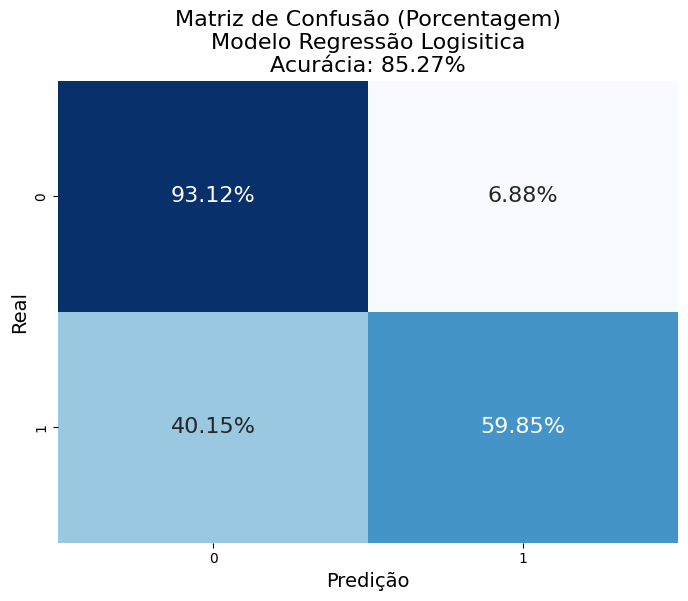

In [ ]:
grafico_matriz_confusao(conf_matrix,accuracy, 'Modelo Regressão Logisitica')

ROC AUC: 0.9043476729016889


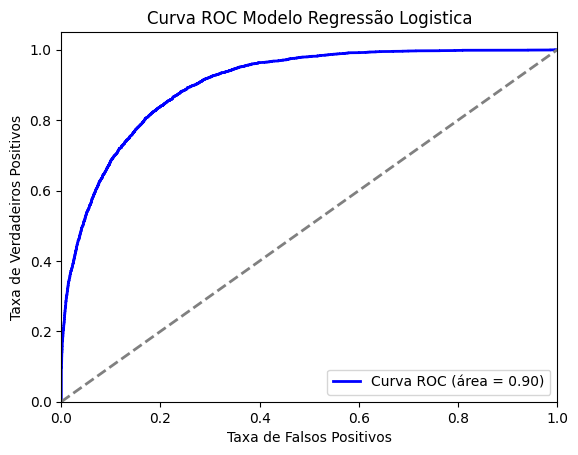

In [ ]:
grafico_curva_roc(fpr, tpr,roc_auc, 'Modelo Regressão Logistica')

In [ ]:
grafico_metricas_sensiveis(y_pred)

alt.VConcatChart(...)

# **MODELO GRADIENT BOOSTING CLASSIFIER**

In [ ]:
%%time
# Inicializar o modelo Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treinar o modelo
gb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = gb_model.predict(X_test)
y_pred_prob = gb_model.predict_proba(X_test)[:, 1] # para a curva roc

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

print(f'Accuracy: {accuracy:.2f}')

# Imprimir um relatório detalhado de classificação
print(classification_report(y_test, y_pred))

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     12435
           1       0.79      0.61      0.69      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.78      0.80     16281
weighted avg       0.87      0.87      0.86     16281

CPU times: user 7.88 s, sys: 11.4 ms, total: 7.89 s
Wall time: 7.86 s


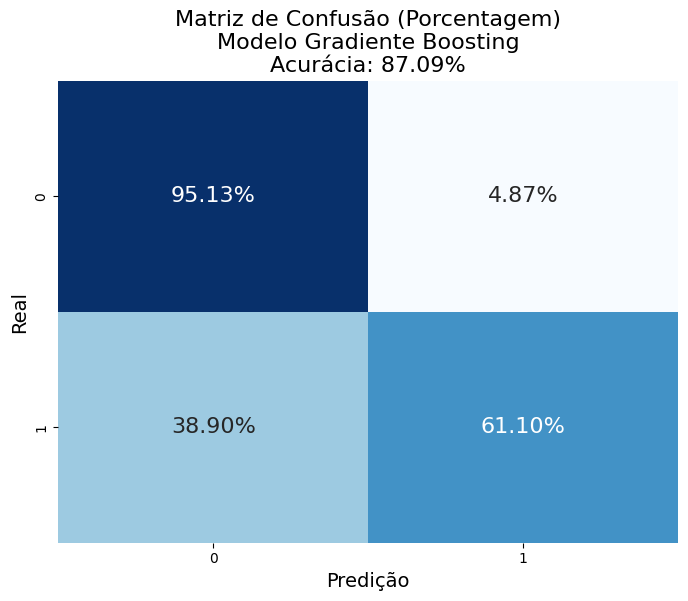

In [ ]:
grafico_matriz_confusao(conf_matrix,accuracy,'Modelo Gradiente Boosting')

ROC AUC: 0.9207989501727234


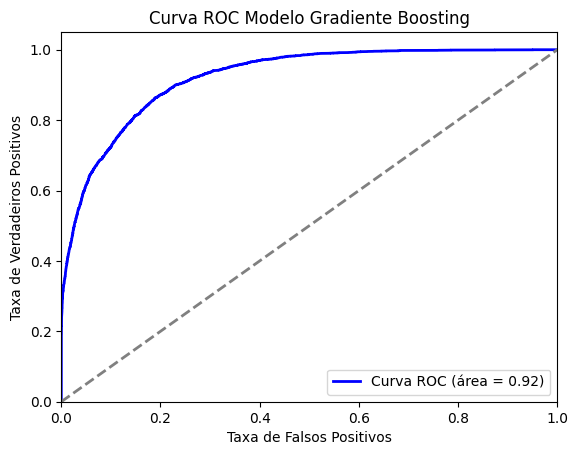

In [ ]:
grafico_curva_roc(fpr, tpr,roc_auc, 'Modelo Gradiente Boosting')

In [ ]:
grafico_metricas_sensiveis(y_pred)

alt.VConcatChart(...)

# **MODELO RANDOM FOREST CLASSIFIER**

In [ ]:
%%time
# Inicializar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1] # para a curva roc

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Imprimir um relatório detalhado de classificação
print(f'Random Forest Accuracy: {accuracy:.4f}')

print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8582
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12435
           1       0.80      0.53      0.64      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.75      0.78     16281
weighted avg       0.85      0.86      0.85     16281

CPU times: user 3.22 s, sys: 8.89 ms, total: 3.23 s
Wall time: 3.23 s


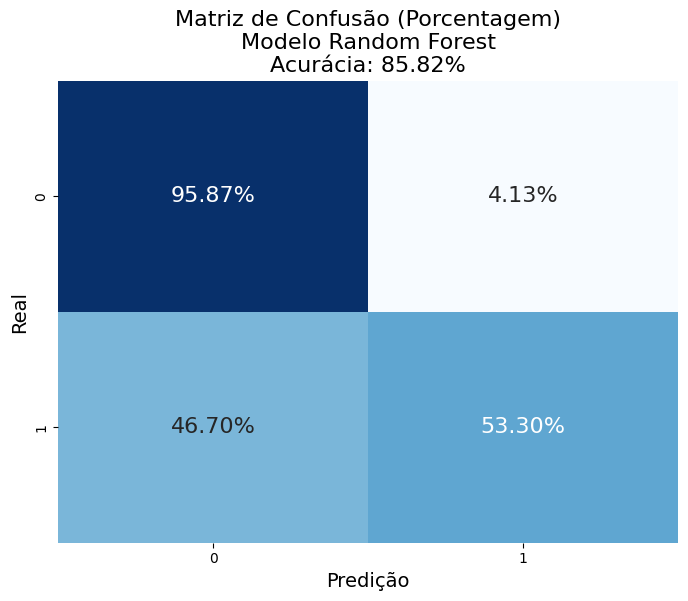

In [ ]:
grafico_matriz_confusao(conf_matrix,accuracy,'Modelo Random Forest')

ROC AUC: 0.9116988057085613


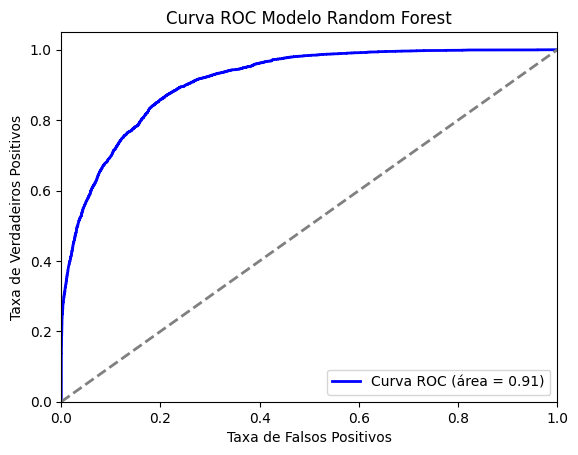

In [ ]:
grafico_curva_roc(fpr, tpr,roc_auc, 'Modelo Random Forest')

In [ ]:
grafico_metricas_sensiveis(y_pred)

alt.VConcatChart(...)

#Exibindo resultados

In [ ]:
# Preparar o DataFrame para o Aequitas
aequitas_df = test_data_adult[['sex', 'race']].copy()
aequitas_df['label'] = test_data_adult['income']  # Renomeia a coluna de rótulo para 'label_value'
aequitas_df['score'] = y_pred  # Adiciona as previsões do modelo

# Inicializando o Audit sem passar o DataFrame
audit = Audit(aequitas_df)

# Gera o gráfico de summary_plot para as métricas desejadas
audit.audit()
# Obtém o relatório completo

# Acessar e exibir o DataFrame de métricas
metrics_df = audit.metrics_df
print(metrics_df.head())


   model_id score_threshold     k attribute_name     attribute_value  \
0         0      binary 0/1  2563            sex              Female   
1         0      binary 0/1  2563            sex                Male   
2         0      binary 0/1  2563           race  Amer-Indian-Eskimo   
3         0      binary 0/1  2563           race  Asian-Pac-Islander   
4         0      binary 0/1  2563           race               Black   

   accuracy       tpr       tnr       for       fdr  ...     pprev   fp    fn  \
0  0.930640  0.447458  0.989650  0.063834  0.159236  ...  0.057923   50   326   
1  0.822007  0.548526  0.939111  0.170712  0.205869  ...  0.207090  463  1470   
2  0.905660  0.315789  0.985714  0.086093  0.250000  ...  0.050314    2    13   
3  0.837500  0.601504  0.927954  0.141333  0.238095  ...  0.218750   25    53   
4  0.925048  0.474860  0.983357  0.064694  0.212963  ...  0.069186   23    94   

     tn    tp  group_label_pos  group_label_neg  group_size  total_entities  \
0

In [ ]:
# Acessar e exibir o DataFrame de disparidade
disparity_df = audit.disparity_df
disparity_df.head()


,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,...,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,2563,sex,Female,0.930640,0.447458,0.989650,0.063834,0.159236,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
1,0,binary 0/1,2563,sex,Male,0.822007,0.548526,0.939111,0.170712,0.205869,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
2,0,binary 0/1,2563,race,Amer-Indian-Eskimo,0.905660,0.315789,0.985714,0.086093,0.250000,...,White,White,White,White,White,White,White,White,White,White
3,0,binary 0/1,2563,race,Asian-Pac-Islander,0.837500,0.601504,0.927954,0.141333,0.238095,...,White,White,White,White,White,White,White,White,White,White
4,0,binary 0/1,2563,race,Black,0.925048,0.474860,0.983357,0.064694,0.212963,...,White,White,White,White,White,White,White,White,White,White


In [ ]:
disparity_df.iloc[:,5:22]

,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp
0,0.930640,0.447458,0.989650,0.063834,0.159236,0.010350,0.552542,0.936166,0.840764,314,5107,0.122513,0.057923,50,326,4781,264
1,0.822007,0.548526,0.939111,0.170712,0.205869,0.060889,0.451474,0.829288,0.794131,2249,8611,0.877487,0.207090,463,1470,7141,1786
2,0.905660,0.315789,0.985714,0.086093,0.250000,0.014286,0.684211,0.913907,0.750000,8,151,0.003121,0.050314,2,13,138,6
3,0.837500,0.601504,0.927954,0.141333,0.238095,0.072046,0.398496,0.858667,0.761905,105,375,0.040968,0.218750,25,53,322,80
4,0.925048,0.474860,0.983357,0.064694,0.212963,0.016643,0.525140,0.935306,0.787037,108,1453,0.042138,0.069186,23,94,1359,85
5,0.874074,0.400000,0.981818,0.121951,0.166667,0.018182,0.600000,0.878049,0.833333,12,123,0.004682,0.088889,2,15,108,10
6,0.850710,0.535530,0.955910,0.139549,0.197854,0.044090,0.464470,0.860451,0.802146,2330,11616,0.909091,0.167073,461,1621,9995,1869


In [ ]:
# # Exibir estatísticas descritivas das métricas
# print(metrics_df.describe())

# # Exibir estatísticas descritivas da disparidade
# print(disparity_df.describe())


# **PREPARANDO O MODELO REDE NEURAL FEEDFORWARD ARTIFICIAL (FAN)**



# Tratamento dos dados

In [ ]:
# # URLs dos datasets de treinamento e teste
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Nome das colunas do dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Carregar os dados
train_data_adult = pd.read_csv(train_url, header=None, names=column_names, na_values=" ?", sep=',\s', engine='python')
test_data_adult = pd.read_csv(test_url, header=0, names=column_names, na_values=" ?", sep=',\s', engine='python')

train_data_adult.dropna(inplace=True)
test_data_adult.dropna(inplace=True)

# Codificar a variável alvo ('income')
train_data_adult['income'] = train_data_adult['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
test_data_adult['income'] = test_data_adult['income'].apply(lambda x: 1 if x.strip() == '>50K.' else 0)

# Codificação das variáveis categóricas
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_train_features = encoder.fit_transform(train_data_adult[categorical_cols])
encoded_test_features = encoder.transform(test_data_adult[categorical_cols])



# Concatenação das colunas codificadas com as numéricas
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_train = pd.concat([pd.DataFrame(encoded_train_features), train_data_adult[numeric_cols].reset_index(drop=True)], axis=1)
X_test = pd.concat([pd.DataFrame(encoded_test_features), test_data_adult[numeric_cols].reset_index(drop=True)], axis=1)

# Converter os nomes das colunas para strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Variável alvo
y_train = train_data_adult['income']
y_test = test_data_adult['income']

# Dividir o conjunto de treinamento em treino e validação
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



#______________________________________________________________
from imblearn.over_sampling import SMOTE

smote = SMOTE()


# Rebalanceamento
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Dividir o conjunto de treinamento em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


#______________________________________________________________

# Padronizar as variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Autoencoder

In [ ]:
# O autoencoder é uma arquitetura de rede neural usada principalmente para aprendizado não supervisionado e compressão de dados,
# onde o objetivo é aprender uma representação comprimida (codificada) dos dados de entrada e, em seguida, reconstruir os dados originais.

def build_autoencoder(hp):
    input_shape = 100

    input_layer = layers.Input(shape=(input_shape,))
    encoded = layers.Dense(hp.Int('units1', min_value=32, max_value=128, step=32), activation='relu')(input_layer)
    encoded = layers.Dense(hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu')(encoded)

    decoded = layers.Dense(hp.Int('units3', min_value=32, max_value=128, step=32), activation='relu')(encoded)
    decoded = layers.Dense(input_shape, activation='sigmoid')(decoded)

    autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')), loss='mse')
    return autoencoder

def tune_autoencoder(x_train):
    tuner = kt.Hyperband(
        build_autoencoder,
        objective='val_loss',
        max_epochs=20,
        factor=3,
        directory='autoencoder_tuning',
        project_name='autoencoder'
    )

    tuner.search(X_train, X_train, epochs=10, validation_split=0.2)
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    # Print hyperparameters in a more readable format
    print("Best hyperparameters:")
    print(f"Units in the first layer: {best_hps.get('units1')}")
    print(f"Units in the second layer: {best_hps.get('units2')}")
    print(f"Units in the third layer: {best_hps.get('units3')}")
    print(f"Learning rate: {best_hps.get('learning_rate')}")

    return best_hps


tune_autoencoder(X_train)

Trial 30 Complete [00h 01m 12s]
val_loss: 0.8188762068748474

Best val_loss So Far: 0.8080378770828247
Total elapsed time: 00h 13m 47s
Best hyperparameters:
Units in the first layer: 96
Units in the second layer: 48
Units in the third layer: 96
Learning rate: 0.00016378962306363488


In [ ]:
best_hps = tune_autoencoder(X_train)

Reloading Tuner from autoencoder_tuning/autoencoder/tuner0.json
Best hyperparameters:
Units in the first layer: 96
Units in the second layer: 48
Units in the third layer: 96
Learning rate: 0.00016378962306363488


In [ ]:
best_hps.get('learning_rate')

0.00016378962306363488

In [ ]:
# Definir a arquitetura do Autoencoder
input_shape = X_train.shape[1]

def build_autoencoder(input_shape, units1, units2, units3, learning_rate):
    input_layer = tf.keras.layers.Input(shape=(input_shape,))
    encoded = tf.keras.layers.Dense(units1, activation='relu')(input_layer)
    encoded = tf.keras.layers.Dense(units2, activation='relu')(encoded)
    decoded = tf.keras.layers.Dense(units3, activation='relu')(encoded)
    decoded = tf.keras.layers.Dense(input_shape, activation='sigmoid')(decoded)

    autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return autoencoder


In [ ]:
# Treinamento do Autoencoder
# Classificação Baseada em Custo
# Para ajustar o peso das classes em redes neurais, você pode usar o argumento class_weight durante o treinamento.
# Isso penaliza mais os erros nas classes minoritárias.

# Instanciando o autoencoder
autoencoder = build_autoencoder(
    input_shape=input_shape,
    units1=best_hps.get('units1'),
    units2=best_hps.get('units2'),
    units3=best_hps.get('units3'),
    learning_rate=best_hps.get('learning_rate')
)


# Treinamento com pesos de classe
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, shuffle=True,
                validation_data=(X_val, X_val))



Epoch 1/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1681 - val_loss: 1.0115
Epoch 2/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9747 - val_loss: 0.9365
Epoch 3/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8832 - val_loss: 0.8989
Epoch 4/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8677 - val_loss: 0.8792
Epoch 5/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8252 - val_loss: 0.8690
Epoch 6/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8435 - val_loss: 0.8638
Epoch 7/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8499 - val_loss: 0.8605
Epoch 8/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8303 - val_loss: 0.8582
Epoch 9/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7866 - val_loss: 0.8565
Epoch 10/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8370 - val_loss: 0.8552
Epoch 11/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8421 - val_loss: 0.8541
Epoch 12/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
# a codificação do autoencoder é usada para obter uma representação reduzida dos dados de entrada.
X_train_encoded = autoencoder.predict(X_train)
X_val_encoded = autoencoder.predict(X_val)
X_test_encoded = autoencoder.predict(X_test)


1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Classificador

In [ ]:
# Projetada para construir um classificador com hiperparâmetros ajustáveis, que são fornecidos pelo objeto hp (HyperParameters).
# Isso é usado em conjunto com o Keras Tuner para realizar uma busca automatizada pelos melhores hiperparâmetros para o modelo.
def build_classifier(hp):
    input_shape = X_train.shape[1]

    input_layer = tf.keras.layers.Input(shape=(input_shape,))

    # Hiperparâmetros para o número de unidades nas camadas ocultas
    units1 = hp.Int('units1', min_value=32, max_value=128, step=32)
    units2 = hp.Int('units2', min_value=16, max_value=64, step=16)

    # Hiperparâmetro para a taxa de dropout
    dropout_rate = hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1)

    hidden = tf.keras.layers.Dense(units1, activation='relu',
                                   kernel_regularizer=regularizers.l2(0.001))(input_layer)
    hidden = tf.keras.layers.Dropout(dropout_rate)(hidden)
    hidden = tf.keras.layers.Dense(units2, activation='relu',
                                   kernel_regularizer=regularizers.l2(0.001))(hidden)
    output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden)

    classifier = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    classifier.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [ ]:
#  Keras Tuner para realizar a busca por hiperparâmetros e encontrar a melhor
# configuração para o classificador definido pela função build_classifier
def tune_classifier(x_train, y_train):
    tuner = kt.Hyperband(
        build_classifier,
        objective='val_accuracy',
        max_epochs=20,
        factor=3,
        directory='classifier_tuning',
        project_name='classifier'
    )

    tuner.search(x_train, y_train, epochs=20, validation_split=0.2)
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    return best_hps


In [ ]:
best_hps = tune_classifier(X_train, y_train)

# Aplicar os melhores hiperparâmetros encontrados
input_shape = X_train.shape[1]
classifier = build_classifier(best_hps)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinar o modelo com os melhores hiperparâmetros
# history = classifier.fit(X_train, y_train, epochs=20, validation_split=0.2)
history_classifier = classifier.fit(X_train_encoded, y_train, epochs=20, batch_size=128, validation_data=(X_val_encoded, y_val), callbacks=[early_stopping])

Trial 30 Complete [00h 01m 05s]
val_accuracy: 0.8837062120437622

Best val_accuracy So Far: 0.8843382596969604
Total elapsed time: 00h 13m 55s
Epoch 1/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7644 - loss: 0.6163 - val_accuracy: 0.8283 - val_loss: 0.4246
Epoch 2/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8238 - loss: 0.4217 - val_accuracy: 0.8278 - val_loss: 0.3999
Epoch 3/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8303 - loss: 0.3959 - val_accuracy: 0.8292 - val_loss: 0.3855
Epoch 4/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8289 - loss: 0.3857 - val_accuracy: 0.8329 - val_loss: 0.3759
Epoch 5/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8298 - loss: 0.3787 - val_accuracy: 0.8311 - val_loss: 0.3722
Epoch 6/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8353 - loss: 0.3689 - val_accuracy: 0.8340 - val_loss: 0.3675
Epoch 7/20
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8371 - loss: 0.3667 - v

In [ ]:
# # Instanciando o classificador
# classifier = build_classifier(input_shape)

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# history_classifier = classifier.fit(X_train_encoded, y_train, epochs=300, batch_size=128, validation_data=(X_val_encoded, y_val), callbacks=[early_stopping])


# Avaliação do Modelo

In [ ]:
# Previsão do classificador no conjunto de teste
y_pred_income = classifier.predict(X_test_encoded)
y_pred_income = (y_pred_income > 0.5).astype(int)

# Avaliação do classificador para prever 'income'
conf_matrix_income = confusion_matrix(y_test, y_pred_income)

# Calcular porcentagens
conf_matrix_percentage = conf_matrix_income.astype('float') / conf_matrix_income.sum(axis=1)[:, np.newaxis] * 100
labels = [f"{value:.2f}%" for value in conf_matrix_percentage.flatten()]
labels = np.array(labels).reshape(conf_matrix_income.shape)

# Calcular a Curva ROC
fpr, tpr, _ = roc_curve(y_test, classifier.predict(X_test_encoded))
roc_auc = roc_auc_score(y_test, classifier.predict(X_test_encoded))


# Acurácia (em porcentagem)
accuracy_income = accuracy_score(y_test, y_pred_income)
accuracy_income

509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.8232909526441865

In [ ]:
y_pred_income.shape

(16281, 1)

In [ ]:
X_test.shape

(16281, 100)

In [ ]:
grafico_metricas_sensiveis(y_pred_income)

alt.VConcatChart(...)

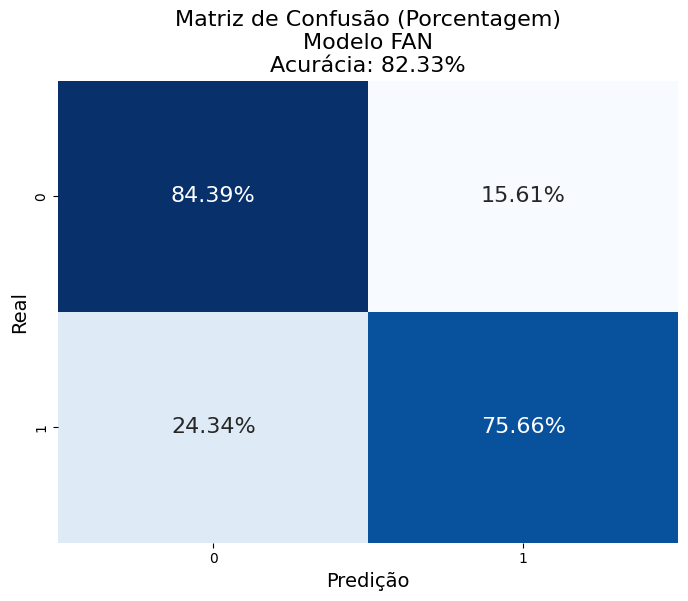

In [ ]:
grafico_matriz_confusao(conf_matrix_income,accuracy_income,'Modelo FAN')

ROC AUC: 0.8941209212501996


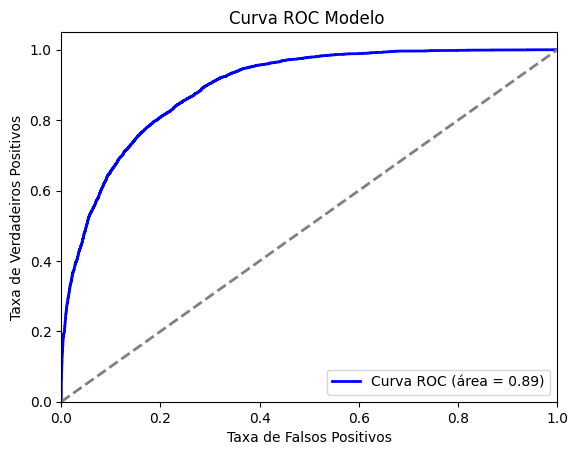

In [ ]:
grafico_curva_roc(fpr, tpr,roc_auc, 'Modelo ')

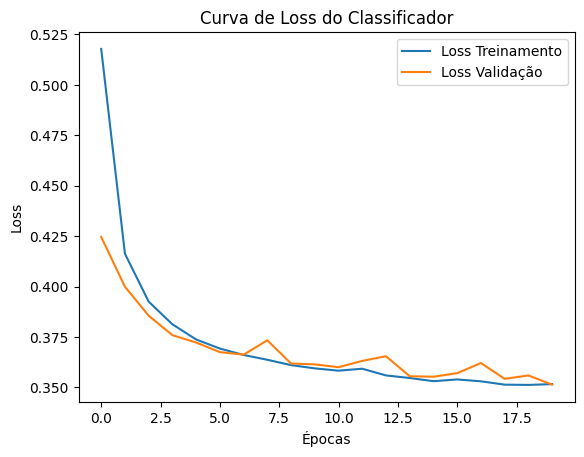

In [ ]:
# Plotar a curva de loss (erro)
plt.plot(history_classifier.history['loss'], label='Loss Treinamento')
plt.plot(history_classifier.history['val_loss'], label='Loss Validação')
plt.title('Curva de Loss do Classificador')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()


Salvando o Modelo

In [ ]:
# Salvar o autoencoder no formato nativo Keras
autoencoder.save('autoencoder_model.keras')

# Salvar o classificador no formato nativo Keras
classifier.save('classifier_model.keras')



In [ ]:
# Carregar o autoencoder
autoencoder_loaded = load_model('/content/autoencoder_model.keras')

# Carregar o classificador
classifier_loaded = load_model('/content/classifier_model.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Previsão com o autoencoder carregado
X_test_encoded = autoencoder_loaded.predict(X_test)

# Previsão com o classificador carregado
y_pred_income = classifier_loaded.predict(X_test_encoded)
y_pred_income = (y_pred_income > 0.5).astype(int)

# Avaliação do classificador
accuracy_income = accuracy_score(y_test, y_pred_income) * 100
print(f'Acurácia: {accuracy_income:.2f}%')


# history_classifier = classifier_loaded.fit(X_train_encoded, y_train, epochs=10, batch_size=128,
#                                            validation_data=(X_val_encoded, y_val))

509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Acurácia: 82.33%
